In [493]:
import pandas as pd
import numpy as np
import seaborn as sb

Load the file regdataex.csv

In [610]:
df = pd.read_csv("regdataex.csv")

Use head, info and describe 

In [611]:
df.head()

A   B   C   D    E   F    G  H   I  Target
0  20  39  -8  89  103  10  320  C  21    2637
1  46  39   6  45  102  10  109  B  17    4265
2  62  12   3  12  146  26  384  D  16    5906
3  33  45  -1  89  103  36  444  A   7    3326
4  29  28 -72  12  126  23  117  D   2     703

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         500 non-null int64
E         500 non-null int64
F         500 non-null int64
G         500 non-null int64
H         500 non-null object
I         500 non-null int64
Target    500 non-null int64
dtypes: int64(9), object(1)
memory usage: 39.1+ KB


In [613]:
df.describe()

A          B           C            D           E           F  \
count  500.000000  500.00000  500.000000   500.000000  500.000000  500.000000   
mean    39.920000   28.28000  -38.952000   372.830000  146.634000   20.200000   
std     15.694273   10.39778   34.834416  1645.237636   28.975908   11.878307   
min     14.000000   10.00000 -100.000000 -2000.000000  100.000000    0.000000   
25%     26.000000   19.00000  -68.000000    20.000000  121.000000   10.000000   
50%     40.000000   28.00000  -39.500000    65.000000  145.000000   20.000000   
75%     54.000000   38.00000   -7.750000    99.000000  169.000000   30.000000   
max     67.000000   45.00000   20.000000  6800.000000  200.000000   40.000000   

                G           I       Target  
count  500.000000  500.000000   500.000000  
mean   224.966000   11.020000  3040.658000  
std    135.069598    6.771951  1778.948155  
min    -20.000000    0.000000 -1221.000000  
25%    111.750000    5.000000  1604.750000  
50%    225.000000   11.000000  2980.500000  
75%    338.750000   17.000000  4398.750000  
max    450.000000   22.000000  7107.000000

Create a pair plot

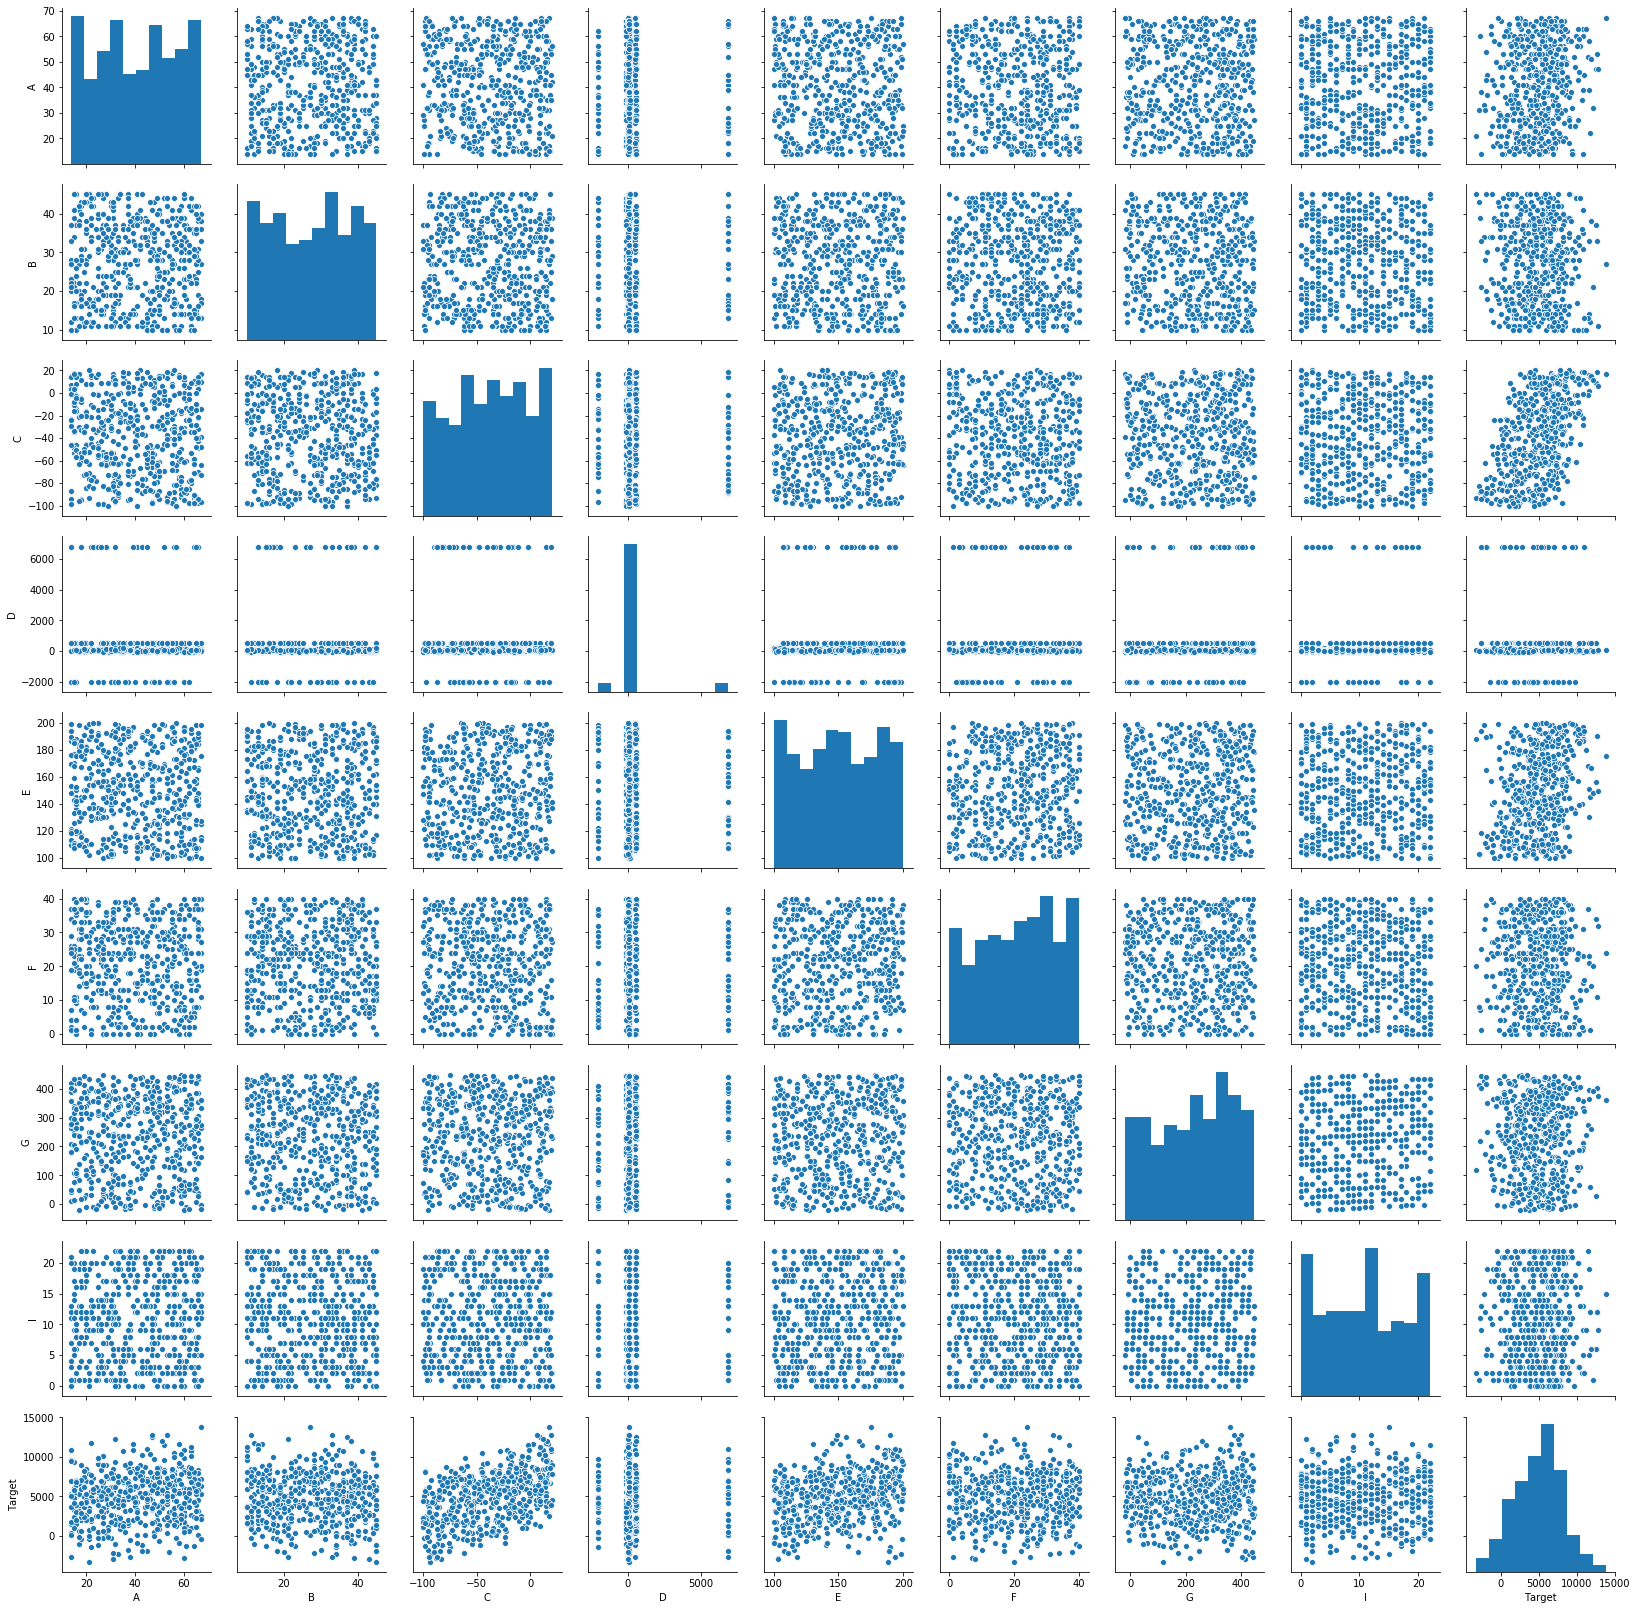

In [521]:
sb.pairplot(df)

Create a Linear Regression model:<br>
* split train and test
* check the results

In [614]:
import sklearn.linear_model as sl

In [615]:
import sklearn.model_selection as sm

In [616]:
X_train, X_test, y_train, y_test = sm.train_test_split(df.drop(['Target','H'],axis=1), df['Target'], test_size=0.33,random_state=101)

In [617]:
model = sl.LinearRegression()

In [618]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [619]:
model.coef_

array([ 3.44407489e+01, -1.92623180e+00,  4.46444172e+01,  1.33837310e-03,
        1.97675234e+01, -8.34870734e-01,  9.02150139e-02,  2.60544854e+00])

In [620]:
model.intercept_

523.4192868464415

In [621]:
pred = model.predict(X_test)

In [622]:
from sklearn import metrics

In [623]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

276.88783914909607

In [624]:
model.score(X_test,y_test)

0.9766959684247567

Try to reduce the dimensionality check the model with:<br>
* ['A', 'B', 'E', 'F', 'G', 'I']
* ['A', 'C', 'D', 'F', 'G', 'I']
* ['A', 'E', 'F', 'G', 'I']
* ['B', 'E', 'F']


In [630]:
X_train, X_test, y_train, y_test = sm.train_test_split(df[['A', 'B', 'E', 'F', 'G', 'I']], df['Target'], test_size=0.33,random_state=101)

In [631]:
model = sl.LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.13250254575241416

Use itertools.combination to find the minimum set of features to get a score > 0.95<br>
hint for using itertools:

In [580]:
import itertools

In [633]:
l = itertools.combinations([1,2,3],2)
for i in l:
    print(i)

(1, 2)
(1, 3)
(2, 3)


In [627]:
for i in range(1,8):
    c = itertools.combinations("ABCDEFGI",i)
    for item in c:
        ls = list(item) 
        X_train, X_test, y_train, y_test = sm.train_test_split(df[ls], df['Target'], test_size=0.33,random_state=101)
        model = sl.LinearRegression()
        model.fit(X_train,y_train)
        score = model.score(X_test,y_test)
        if score > 0.95:
            print(ls,score)

['A', 'C', 'E'] 0.9766181091837871
['A', 'B', 'C', 'E'] 0.9767778382189206
['A', 'C', 'D', 'E'] 0.9766182074295001
['A', 'C', 'E', 'F'] 0.97647660002007
['A', 'C', 'E', 'G'] 0.9765680040809619
['A', 'C', 'E', 'I'] 0.9767709844294518
['A', 'B', 'C', 'D', 'E'] 0.9767787020825073
['A', 'B', 'C', 'E', 'F'] 0.9766191062036725
['A', 'B', 'C', 'E', 'G'] 0.9767104610896946
['A', 'B', 'C', 'E', 'I'] 0.9769138183001518
['A', 'C', 'D', 'E', 'F'] 0.9764754631801836
['A', 'C', 'D', 'E', 'G'] 0.9765686769452983
['A', 'C', 'D', 'E', 'I'] 0.9767714581922881
['A', 'C', 'E', 'F', 'G'] 0.9764277255418516
['A', 'C', 'E', 'F', 'I'] 0.9766433059156396
['A', 'C', 'E', 'G', 'I'] 0.9767136345061034
['A', 'B', 'C', 'D', 'E', 'F'] 0.9766177934767017
['A', 'B', 'C', 'D', 'E', 'G'] 0.9767121621328042
['A', 'B', 'C', 'D', 'E', 'I'] 0.9769160628050271
['A', 'B', 'C', 'E', 'F', 'G'] 0.9765526365591527
['A', 'B', 'C', 'E', 'F', 'I'] 0.9767694039007344
['A', 'B', 'C', 'E', 'G', 'I'] 0.9768358101313805
['A', 'C', 'D', '